## CUSTOMER SEGMENTATION AND DEPOSIT DETECTION SYSTEM CASE STUDY


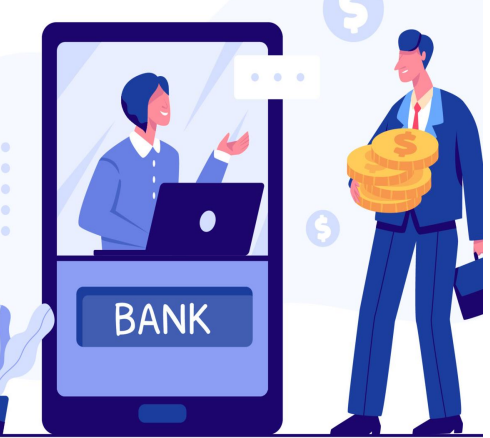

In [3]:
pic = Image.open(r"C:\Users\ACER SPIN3\Downloads\Capture.PNG")
display(pic)

In [2]:
from PIL import Image
from IPython.display import display

# Problem Definition:

The main problem Nexus bank is facing is suboptimal operational efficiency resulting from insufficient understanding of customer behaviors and marketing campaign effectiveness. Specifically, the bank seeks to better anticipate future customer behavior, understand the likelihood of deposits from customers, identify patterns that indicate a customer's likelihood to default on loans.

A solution to this problem would consist of the following components:

* 1. Customer Segmentation: Classify customers into different segments based on their behaviors and demographic information. This will help the bank understand their customer base better and tailor their services to each group, thereby improving customer satisfaction and retention.

* 2. Deposit Likelihood Prediction: Predict the likelihood of a customer making a deposit. This will enable the bank to target customers who are likely to make deposits, optimizing their resource allocation, and increasing deposit rates.

* 3. Default Prediction: Predict the likelihood of a customer defaulting on their loans. This will help the bank mitigate risks and reduce financial losses associated with loan defaults.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Picture size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,4)

#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
dt = pd.read_csv(r"C:\Users\ACER SPIN3\Downloads\PROJECTS\PYTHON\NEXT\bank.csv")

dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#check null

dt.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
#check for dupicates 

dt.duplicated().sum()

0

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
dt.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [10]:
dt.shape

(45211, 17)

In [11]:
##check for unique values within the columns

for col in dt.columns:
    if dt[col].dtype == 'object':  # check if column's data type is 'object'
        print(f'{col} unique categories :' , dt[col].unique())
        
        

job unique categories : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital unique categories : ['married' 'single' 'divorced']
education unique categories : ['tertiary' 'secondary' 'unknown' 'primary']
default unique categories : ['no' 'yes']
housing unique categories : ['yes' 'no']
loan unique categories : ['no' 'yes']
contact unique categories : ['unknown' 'cellular' 'telephone']
month unique categories : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome unique categories : ['unknown' 'failure' 'other' 'success']
deposit unique categories : ['no' 'yes']


In [12]:
##% ofunknown

for col in dt.columns:
    if dt[col].dtype == 'object':  # checks if column's data type is 'object'
        unknown_count = (dt[col] == 'unknown').sum()  # counts the 'unknown' in the column
        unknown_percentage = (unknown_count / dt.shape[0]) * 100  
        print(f'{col}: {unknown_count}, {unknown_percentage:.2f}% unknown')
        



job: 288, 0.64% unknown
marital: 0, 0.00% unknown
education: 1857, 4.11% unknown
default: 0, 0.00% unknown
housing: 0, 0.00% unknown
loan: 0, 0.00% unknown
contact: 13020, 28.80% unknown
month: 0, 0.00% unknown
poutcome: 36959, 81.75% unknown
deposit: 0, 0.00% unknown


## Take Note 

* Job With 288 unknown, this represents about 0.64% of the data. Since this is a small proportion will be treated as a separate category. 


* Education: With 1857 unknown, this represents about 4.11% of the data. This is a somewhat larger proportion, but still not a majority so it will be treated as a separate category. 


* Contact: With 13020 unknown, this represents about 28.8% of  data. This is a significant proportion. However it's plausible that the bank didn't record this information for a reason (perhaps these customers are harder to reach) Dropping the column could lose potentially useful information.


* Poutcome: With 36959 unknown, this represents a whopping 81.74%  data. Since most of the data in this column is labelled 'unknown', this column may not be very helpful for the models and ML objectives. I drop it.



In [13]:
#droppoutcome
dt.drop('poutcome',axis=1,inplace=True)

## Exploratory Data Analysis (EDA)

## 1. Univariate

In [14]:
###summary statistics
dt.describe().T


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [15]:
dt.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'deposit'],
      dtype='object')

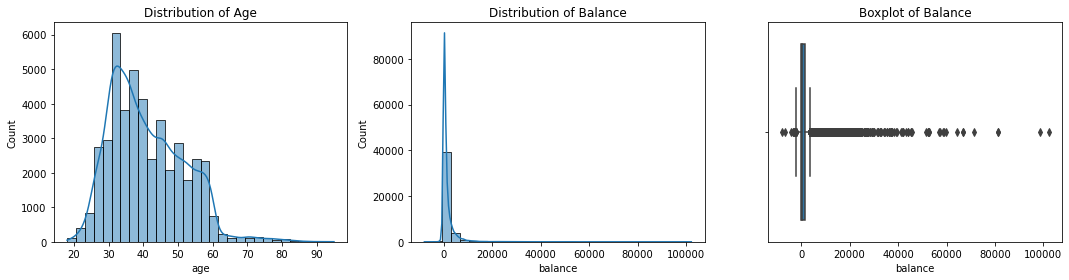

In [16]:
##histogram and box plots of age and balance

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(dt['age'], bins=30, kde=True, ax=axs[0])  
sns.histplot(dt['balance'], bins=30, kde=True, ax=axs[1])
sns.boxplot(x='balance',data=dt, ax=axs[2]) 
axs[0].set_title("Distribution of Age")
axs[1].set_title("Distribution of Balance")
axs[2].set_title("Boxplot of Balance")

plt.tight_layout()  
plt.show()



- The age of our customers spans from 20 to over 90 years old, with a concentration of customers primarily within the 25 to 35 age range.


- The distribution of account balances is left-skewed, indicating that a majority of our customers have lower balances.


- There are outliers in the balance data that exceed the typical maximum value. This suggests that some customers hold significantly higher balances than the majority.

In [17]:
#grouping the age 

def age_grouping(age):
    if age <=25:
        return "<25 Young Adults"
    elif age <=40:
        return "25-40 Adults"
    elif age<=50:
        return "41-50 Old Adults"
    else:
        return ">51 Elders"

dt['age_group'] = dt['age'].apply(age_grouping)


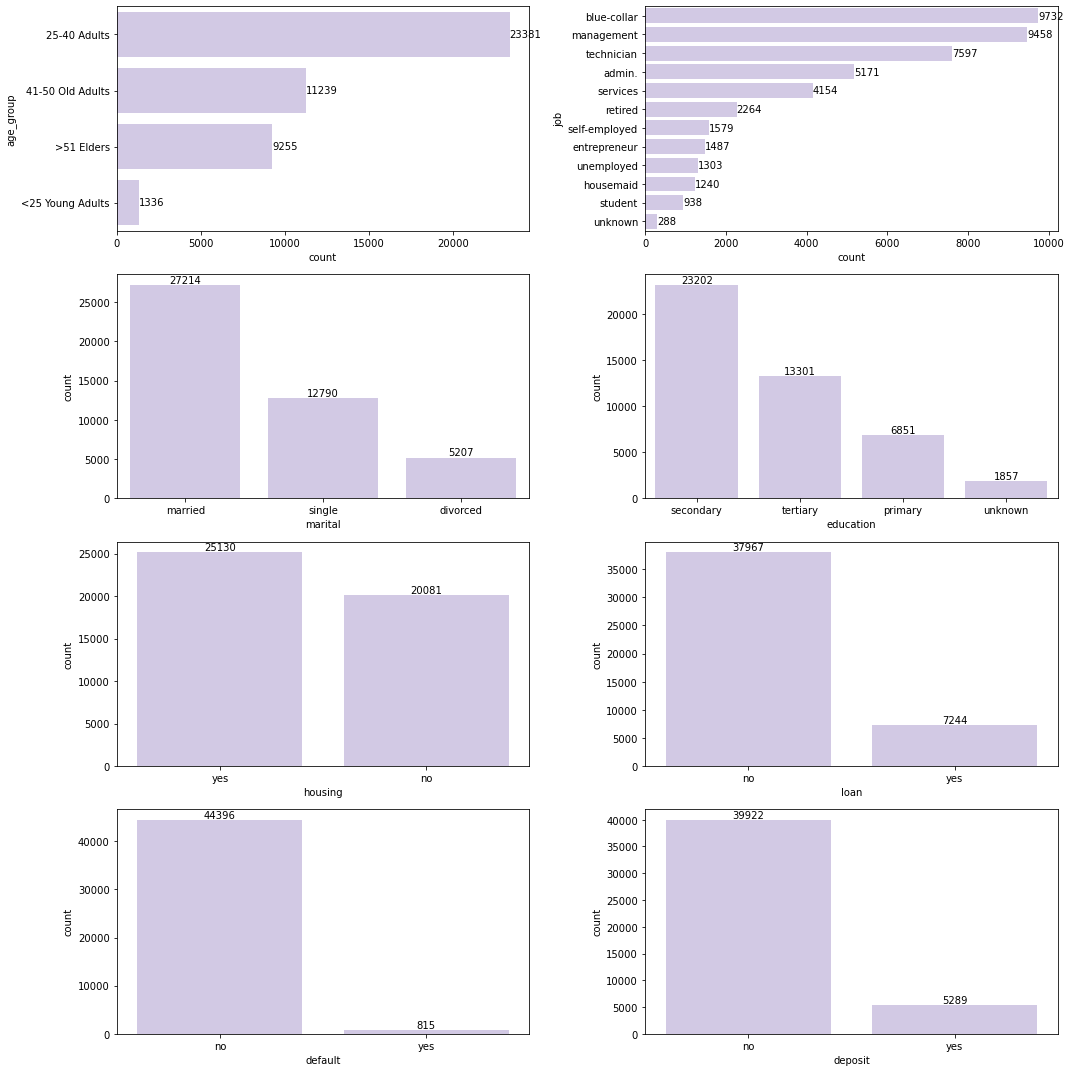

In [28]:

fig, axs = plt.subplots(4, 2, figsize=(15, 15))

# Creating a common color
common_color = "#D1C4E9"  

# Age group
ax = sns.countplot(y=dt['age_group'], order=dt['age_group'].value_counts(ascending=False).index, ax=axs[0, 0], color=common_color)
values = dt['age_group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Job
ax = sns.countplot(y=dt['job'], order=dt['job'].value_counts(ascending=False).index, ax=axs[0, 1], color=common_color)
values = dt['job'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Marital Status
ax = sns.countplot(x=dt['marital'], order=dt['marital'].value_counts(ascending=False).index, ax=axs[1, 0], color=common_color)
values = dt['marital'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Education
ax = sns.countplot(x=dt['education'], order=dt['education'].value_counts(ascending=False).index, ax=axs[1, 1], color=common_color)
values = dt['education'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Housing
ax = sns.countplot(x=dt['housing'], order=dt['housing'].value_counts(ascending=False).index, ax=axs[2, 0], color=common_color)
values = dt['housing'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Loan
ax = sns.countplot(x=dt['loan'], order=dt['loan'].value_counts(ascending=False).index, ax=axs[2, 1], color=common_color)
values = dt['loan'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Default
ax = sns.countplot(x=dt['default'], order=dt['default'].value_counts(ascending=False).index, ax=axs[3, 0], color=common_color)
values = dt['default'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Deposit
ax = sns.countplot(x=dt['deposit'], order=dt['deposit'].value_counts(ascending=False).index, ax=axs[3, 1], color=common_color)
values = dt['deposit'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

plt.tight_layout()
plt.show()


- The majority of our customers fall within the 25 to 40 age group. We observe the least representation from young adults who are below 25 years of age.


- Regarding occupations, most of our customers are engaged in blue-collar jobs, closely followed by management roles. We have a minimal customer base composed of students, as well as a portion of customers who have not disclosed their jobs.


- In terms of marital status, married individuals constitute the majority of our customers, with single individuals being the next largest group. When considering education, most of our customers have attained a secondary level of education, followed by those with tertiary qualifications.


- A significant portion of our customers have housing loans, while fewer have personal loans. Approximately 815 customers have defaulted on their loans, contrasted with the 44,396 who have not. Out of our entire customer base, 39,922 customers have not made deposits, while 5,289 have.

## 2. Bivariate Analysis

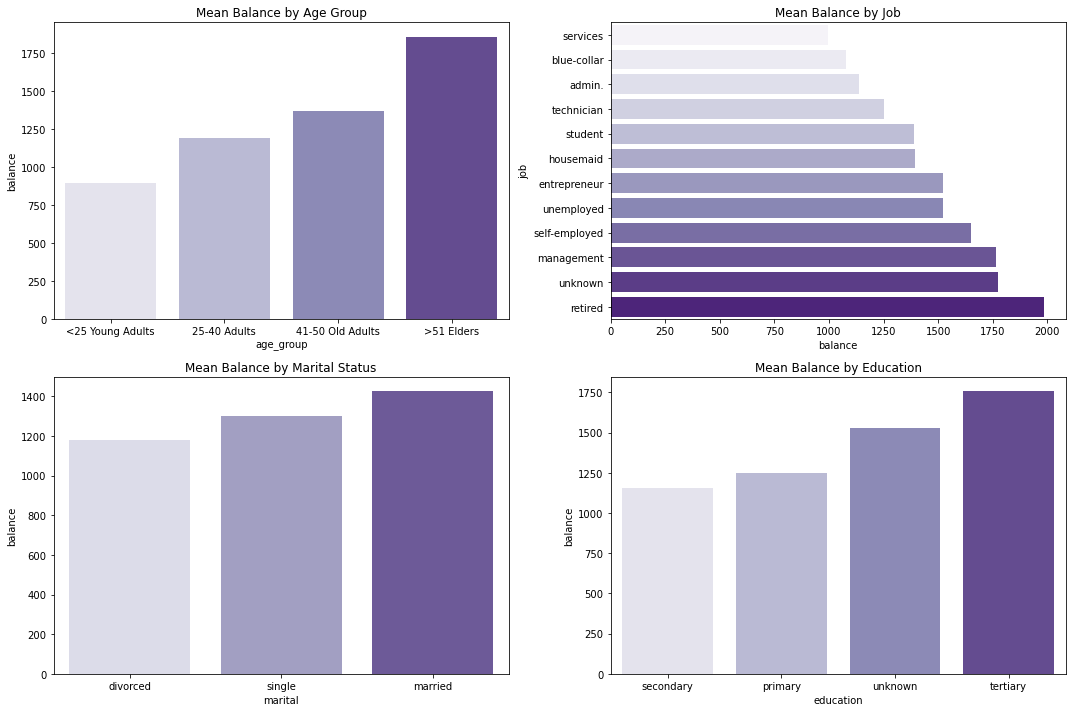

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Mean balance by age group
age_group_bal = dt.groupby('age_group')['balance'].mean().reset_index().sort_values('balance')
sns.barplot(x='age_group', y='balance', data=age_group_bal, ax=axs[0, 0], palette="Purples")
axs[0, 0].set_title('Mean Balance by Age Group')

# Mean balance by job
job_bal = dt.groupby('job')['balance'].mean().reset_index().sort_values('balance')
sns.barplot(y='job', x='balance', data=job_bal, ax=axs[0, 1], palette="Purples")
axs[0, 1].set_title('Mean Balance by Job')

# Mean balance by marital status
marital_bal = dt.groupby('marital')['balance'].mean().reset_index().sort_values('balance')
sns.barplot(x='marital', y='balance', data=marital_bal, ax=axs[1, 0], palette="Purples")
axs[1, 0].set_title('Mean Balance by Marital Status')

# Mean balance by education
education_bal = dt.groupby('education')['balance'].mean().reset_index().sort_values('balance')
sns.barplot(x='education', y='balance', data=education_bal, ax=axs[1, 1], palette="Purples")
axs[1, 1].set_title('Mean Balance by Education')

plt.tight_layout()


1. Mean Balance by Age Group: The elderly demographic (>51 years) holds the highest average balance, followed by adults aged between 41-50 years. The lowest average balance belongs to young adults below 25 years.

2. Mean Balance by Job: Retirees possess the highest average balance. Interestingly, customers who didn't specify their job (listed as unknown) have the second-highest average balance. This is followed by customers in management positions. On the other end of the scale, individuals in blue-collar jobs and services have the lowest average balances.

3. Mean Balance by Education: Clients with tertiary education have the highest average balance, followed by an unknown category. Those with primary and secondary education follow subsequently.

4. Mean Balance by Marital Status: Married customers hold the highest average balance, followed by single customers, with divorced customers holding the least

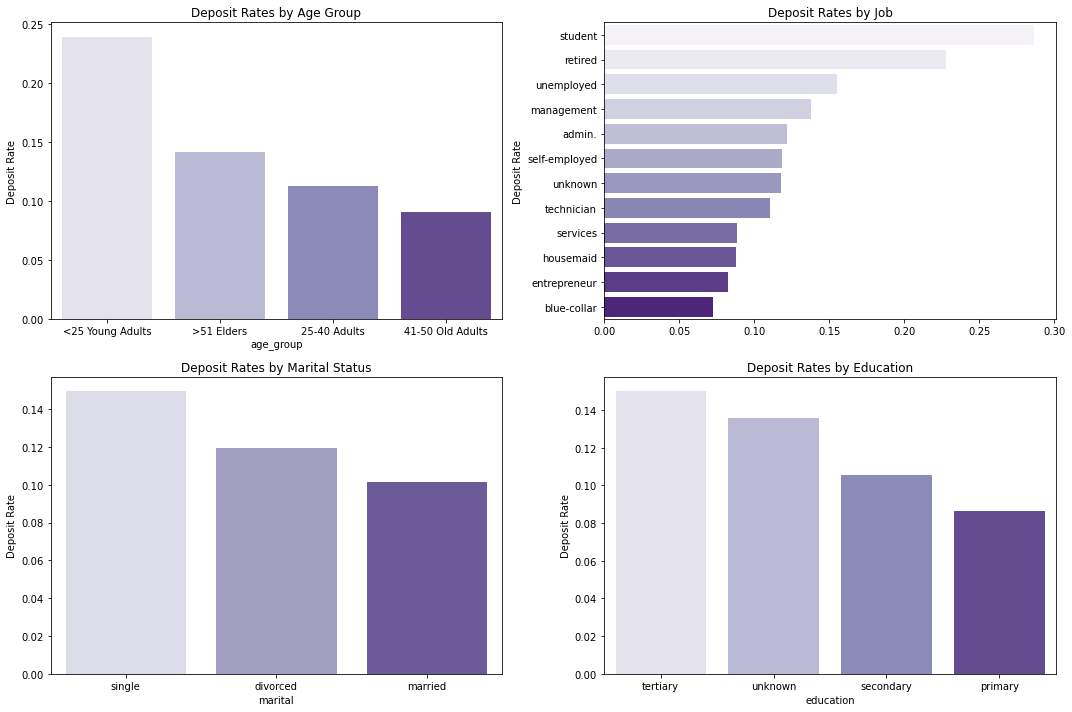

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the purple color palette
purple_palette = sns.color_palette("Purples", as_cmap=True)

# Deposit rates by age group
age_group_dep = (dt[dt['deposit'] == 'yes'].groupby('age_group')['deposit'].count() / dt.groupby('age_group')['deposit'].count()).sort_values(ascending=False)
sns.barplot(x=age_group_dep.index, y=age_group_dep.values, ax=axs[0, 0], palette="Purples")
axs[0, 0].set_title('Deposit Rates by Age Group')
axs[0, 0].set_ylabel('Deposit Rate')

# Deposit rates by job
job_dep = (dt[dt['deposit'] == 'yes'].groupby('job')['deposit'].count() / dt.groupby('job')['deposit'].count()).sort_values(ascending=False)
sns.barplot(y=job_dep.index, x=job_dep.values, ax=axs[0, 1], palette="Purples")
axs[0, 1].set_title('Deposit Rates by Job')
axs[0, 1].set_ylabel('Deposit Rate')

# Deposit rates by marital status
marital_dep = (dt[dt['deposit'] == 'yes'].groupby('marital')['deposit'].count() / dt.groupby('marital')['deposit'].count()).sort_values(ascending=False)
sns.barplot(x=marital_dep.index, y=marital_dep.values, ax=axs[1, 0], palette="Purples")
axs[1, 0].set_title('Deposit Rates by Marital Status')
axs[1, 0].set_ylabel('Deposit Rate')

# Deposit rates by education
education_dep = (dt[dt['deposit'] == 'yes'].groupby('education')['deposit'].count() / dt.groupby('education')['deposit'].count()).sort_values(ascending=False)
sns.barplot(x=education_dep.index, y=education_dep.values, ax=axs[1, 1], palette="Purples")
axs[1, 1].set_title('Deposit Rates by Education')
axs[1, 1].set_ylabel('Deposit Rate')

plt.tight_layout()


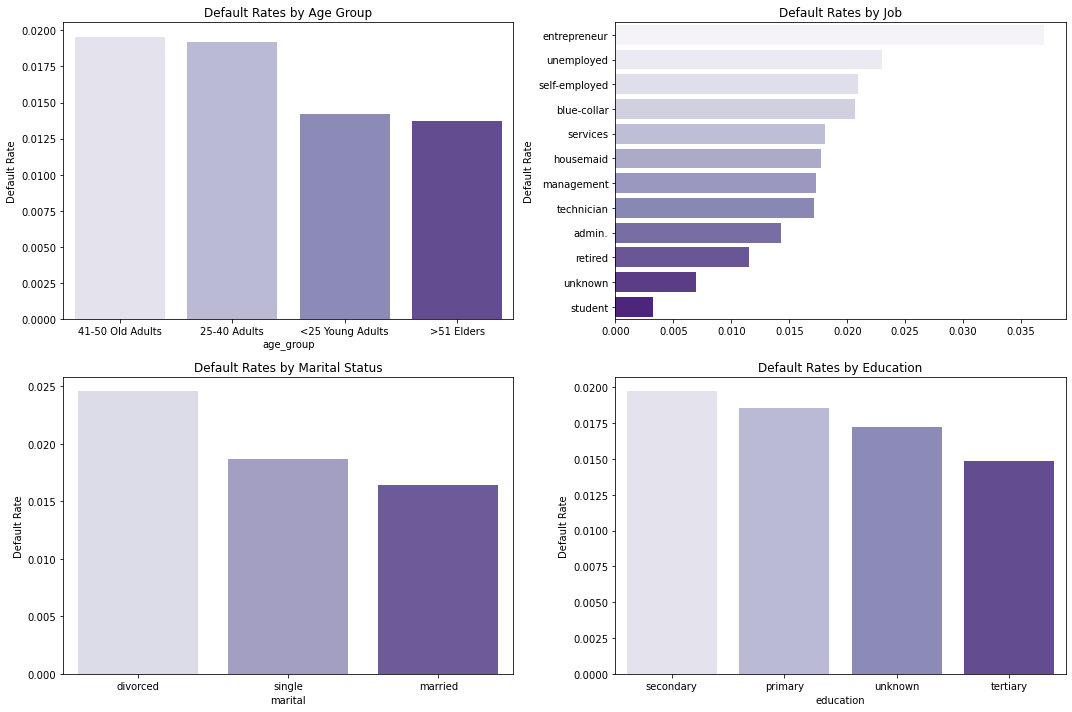

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Default rates by age group
age_group_def = (dt[dt['default']=='yes'].groupby('age_group')['default'].count() / dt.groupby('age_group')['default'].count()).sort_values(ascending=False)
sns.barplot(x=age_group_def.index, y=age_group_def.values, ax=axs[0, 0], palette="Purples")
axs[0, 0].set_title('Default Rates by Age Group')
axs[0, 0].set_ylabel('Default Rate')

# Default rates by job
job_def = (dt[dt['default']=='yes'].groupby('job')['default'].count() / dt.groupby('job')['default'].count()).sort_values(ascending=False)
sns.barplot(y=job_def.index, x=job_def.values, ax=axs[0, 1], palette="Purples")
axs[0, 1].set_title('Default Rates by Job')
axs[0, 1].set_ylabel('Default Rate')

# Default rates by marital status
marital_def = (dt[dt['default']=='yes'].groupby('marital')['default'].count() / dt.groupby('marital')['default'].count()).sort_values(ascending=False)
sns.barplot(x=marital_def.index, y=marital_def.values, ax=axs[1, 0], palette="Purples")
axs[1, 0].set_title('Default Rates by Marital Status')
axs[1, 0].set_ylabel('Default Rate')

# Default rates by education
education_def = (dt[dt['default']=='yes'].groupby('education')['default'].count() / dt.groupby('education')['default'].count()).sort_values(ascending=False)
sns.barplot(x=education_def.index, y=education_def.values, ax=axs[1, 1], palette="Purples")
axs[1, 1].set_title('Default Rates by Education')
axs[1, 1].set_ylabel('Default Rate')

plt.tight_layout()


In [22]:
# Get correlation matrix
correlation_matrix = dt.corr().T

print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


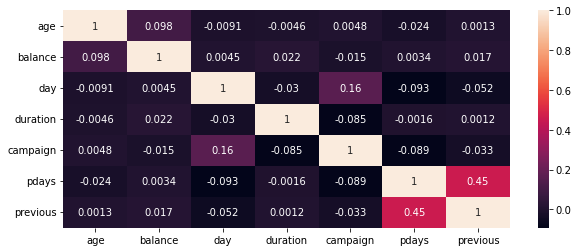

In [23]:


# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True)

# Show the plot
plt.show()


- age and balance (correlation = 0.097783): This suggests a very weak positive relationship between a customer's age and their balance. As age slightly increases, the balance also slightly increases.

- day and campaign (correlation = 0.162490): This suggests a weak positive correlation between the day of the month and the number of contacts performed during this campaign for a client.

- pdays and previous (correlation = 0.454820): This shows a moderate positive relationship. The more days that passed by after the client was last contacted from a previous campaign, the more contacts performed before this campaign.

All the other correlations are quite weak. On the other hand correlation does not imply causation. so these relationships might be influenced by other factors or purely by chance.

# Customer Segmentation - UnsuperVised Machinee Learning

In [29]:
## import libraries for USLearning

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score



In [30]:
usl = dt.copy()
usl.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,>51 Elders
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no,41-50 Old Adults
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no,25-40 Adults
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no,41-50 Old Adults
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no,25-40 Adults


In [31]:
##drop unneeded columns
usl.drop(usl.columns[8::],axis=1,inplace=True)

In [32]:
usl.head(1)

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no


In [33]:
usl.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
dtype: object

In [34]:
##encode object
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in usl.columns[1:]:
    if(usl[c].dtypes=='object'):
        usl[c] = encoder.fit_transform(usl[c])
    else:
        usl[c] = usl[c]
        
usl.head()
        
    

,age,job,marital,education,default,balance,housing,loan
0,58,4,1,2,0,2143,1,0
1,44,9,2,1,0,29,1,0
2,33,2,1,1,0,2,1,1
3,47,1,1,3,0,1506,1,0
4,33,11,2,3,0,1,0,0


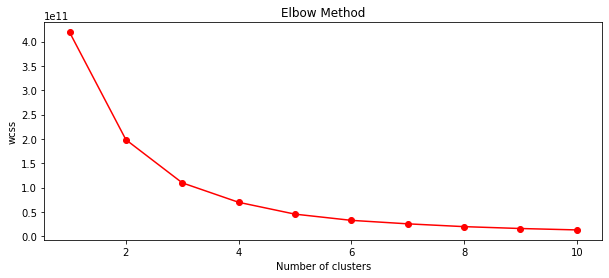

In [35]:
##Determine optimal number of clusters 

wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(usl)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='red',marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
    

In [36]:
## fit k-means clustering model

kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)
kmeans.fit(usl)

## add cluster labels to data
usl['Cluster'] = kmeans.labels_

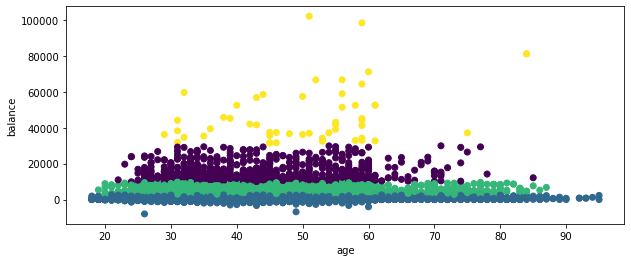

0.756914292614463

In [37]:
### visualize the result

plt.scatter(usl['age'],usl['balance'],c=usl['Cluster'],label='Centroids')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

##calculate silhoutte score

from sklearn.metrics import silhouette_score

silhouette_score(usl, kmeans.labels_)


A silhouette score ranges from -1 to 1, with 1 being a perfect match within its cluster and -1 indicating that the instance is in the wrong cluster. Therefore, a silhouette score of 0.7881 is pretty good. This suggests that the data points within each cluster are close to each other, and the clusters are well-separated.

# Deposit Likelihood Prediction: - SuperVised Machine Learning

In [38]:
#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [39]:
dlp = dt.copy()
dlp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,>51 Elders
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no,41-50 Old Adults
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no,25-40 Adults
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no,41-50 Old Adults
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no,25-40 Adults


In [40]:
dlp.drop(['age_group'], axis=1, inplace=True)

In [41]:
##box plots tocheck outliers 

numerical_cols = dlp.select_dtypes(include=np.number).columns.tolist()

numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

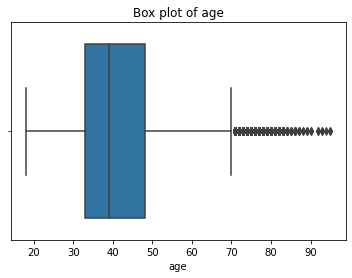

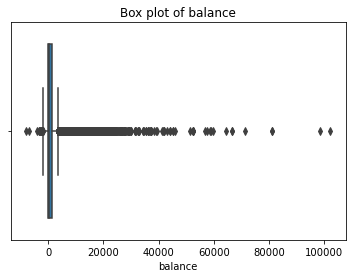

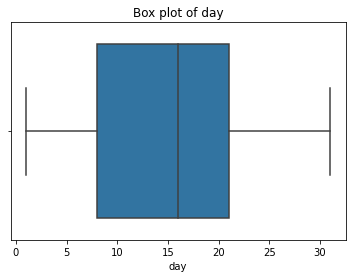

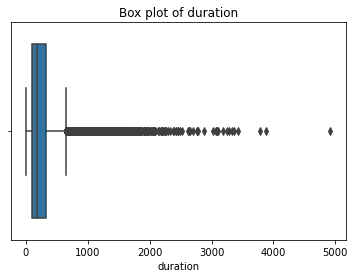

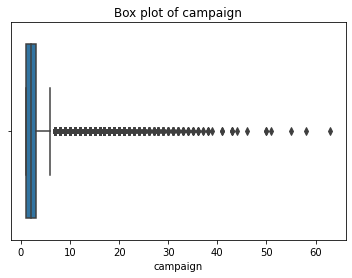

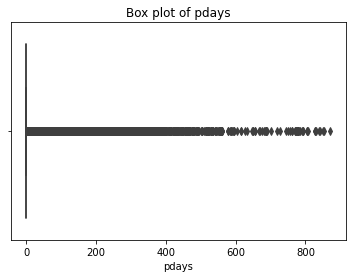

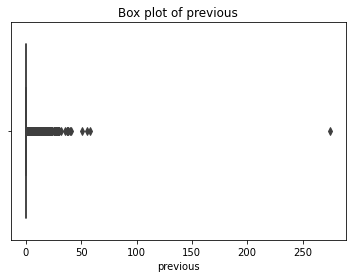

In [42]:
numerical_cols = dlp.select_dtypes(include=np.number).columns

for cols in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(dlp[cols])
    plt.title(f'Box plot of {cols}')


In [43]:
dlp.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'deposit'],
      dtype='object')

In [44]:
dlp1 = dlp[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous']]

label1 = dlp[['deposit']]

In [45]:
dlp1.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0


In [46]:

##endode label 

label1['deposit'] = encoder.fit_transform(label1['deposit'])

In [47]:
label1['deposit']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: deposit, Length: 45211, dtype: int32

## * Normalization

In [48]:
scaler = MinMaxScaler()

dlp1["Scaled_age"] = scaler.fit_transform(dlp1['age'].values.reshape(-1,1))
dlp1["Scaled_balance"] = scaler.fit_transform(dlp1['balance'].values.reshape(-1,1))
dlp1["Scaled_duration"] = scaler.fit_transform(dlp1['duration'].values.reshape(-1,1))
dlp1["Scaled_campaign"] = scaler.fit_transform(dlp1['campaign'].values.reshape(-1,1))
dlp1["Scaled_pdays"] = scaler.fit_transform(dlp1['pdays'].values.reshape(-1,1))
dlp1["Scaled_previous"] = scaler.fit_transform(dlp1['previous'].values.reshape(-1,1))




In [49]:
dlp1.drop(['age','balance','duration','campaign','pdays','previous'],axis=1,inplace=True)

## * Encoding Labels

In [50]:
encoder = LabelEncoder()

for cols in dlp1.columns:
    if dlp1[cols].dtype =='object':
        dlp1[cols] = encoder.fit_transform(dlp1[cols])
    else:
        dlp1[cols] = dlp1[cols]
        
dlp1.head()

,job,marital,education,default,housing,loan,contact,day,month,Scaled_age,Scaled_balance,Scaled_duration,Scaled_campaign,Scaled_pdays,Scaled_previous
0,4,1,2,0,1,0,2,5,8,0.519481,0.092259,0.053070,0.0,0.0,0.0
1,9,2,1,0,1,0,2,5,8,0.337662,0.073067,0.030704,0.0,0.0,0.0
2,2,1,1,0,1,1,2,5,8,0.194805,0.072822,0.015453,0.0,0.0,0.0
3,1,1,3,0,1,0,2,5,8,0.376623,0.086476,0.018707,0.0,0.0,0.0
4,11,2,3,0,0,0,2,5,8,0.194805,0.072812,0.040260,0.0,0.0,0.0


## Supervised Machine learning Model

In [51]:
#split into train and test

X_train,  X_test, y_train, y_test = train_test_split(dlp1, label1,test_size = 0.2, random_state=42)

In [52]:
from sklearn.metrics import confusion_matrix, f1_score
## Machine learning models in classsifier

classifiers = [[XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(),'K-Nearest neighbours'],
               [SGDClassifier(),'SGD Classifier'],
               [SVC(),'SVC'],
               [GaussianNB(),'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]


Model: XGB Classifier
Accuracy: 90%
Precision: 64%
Recall: 49%
F1 score: 55%
ROC score: 73%
Confusion matrix:
 [[7649  303]
 [ 557  534]]



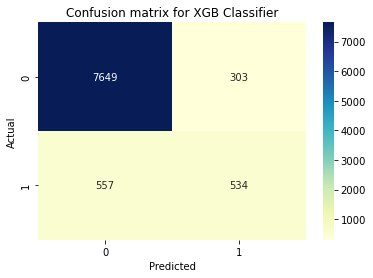



Model: Random Forest
Accuracy: 90%
Precision: 63%
Recall: 40%
F1 score: 49%
ROC score: 68%
Confusion matrix:
 [[7692  260]
 [ 656  435]]



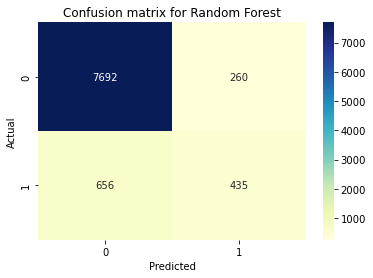



Model: K-Nearest neighbours
Accuracy: 88%
Precision: 51%
Recall: 19%
F1 score: 28%
ROC score: 58%
Confusion matrix:
 [[7758  194]
 [ 886  205]]



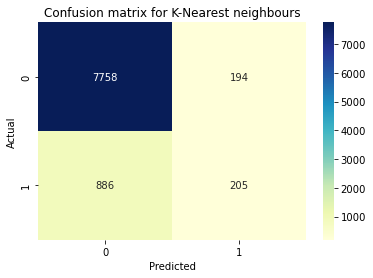



Model: SGD Classifier
Accuracy: 89%
Precision: 55%
Recall: 28%
F1 score: 37%
ROC score: 62%
Confusion matrix:
 [[7704  248]
 [ 787  304]]



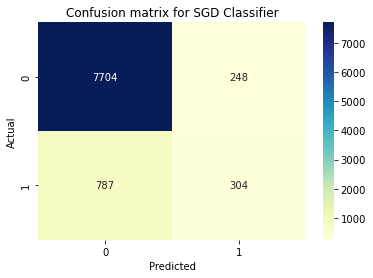



Model: SVC
Accuracy: 88%
Precision: 0%
Recall: 0%
F1 score: 0%
ROC score: 50%
Confusion matrix:
 [[7952    0]
 [1091    0]]



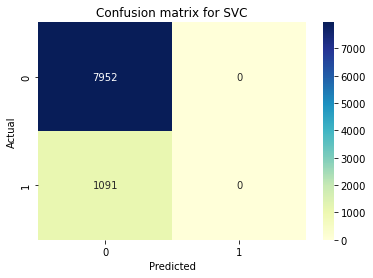



Model: Naive Bayes
Accuracy: 85%
Precision: 39%
Recall: 48%
F1 score: 43%
ROC score: 69%
Confusion matrix:
 [[7128  824]
 [ 571  520]]



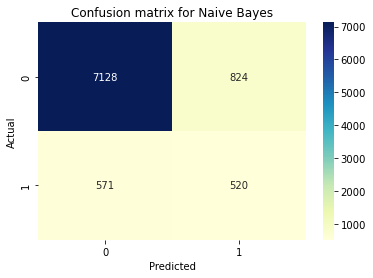



Model: Decision tree
Accuracy: 87%
Precision: 48%
Recall: 47%
F1 score: 48%
ROC score: 70%
Confusion matrix:
 [[7386  566]
 [ 574  517]]



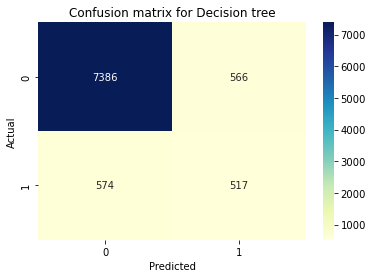



Model: Logistic Regression
Accuracy: 89%
Precision: 60%
Recall: 18%
F1 score: 27%
ROC score: 58%
Confusion matrix:
 [[7822  130]
 [ 897  194]]



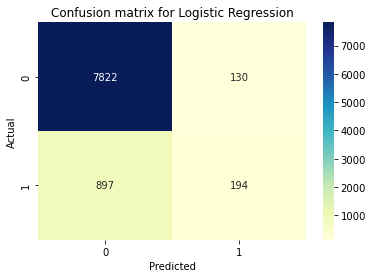

In [53]:
### loop through the algorithm to print the prediction score and confusion matrix
accuracy = {}
precision = {}
recall = {}
f1 = {}
roc = {}
conf_matrix = {}

for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    c_matrix = confusion_matrix(y_test, pred)
    
    accuracy[model_name] = str(round(a_score*100)) + '%'
    precision[model_name] = str(round(p_score*100)) + '%'
    recall[model_name] = str(round(r_score*100)) + '%'
    f1[model_name] = str(round(f_score*100)) + '%'
    roc[model_name] = str(round(roc_score*100)) + '%'
    conf_matrix[model_name] = c_matrix
    
    print(f'Model: {model_name}\nAccuracy: {accuracy[model_name]}\nPrecision: {precision[model_name]}\nRecall: {recall[model_name]}\nF1 score: {f1[model_name]}\nROC score: {roc[model_name]}\nConfusion matrix:\n {conf_matrix[model_name]}\n')

  # this will show the confusion matrix as a heatmap

    plt.figure(figsize=(6, 4))
    sns.heatmap(c_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('\n')

In [54]:
print(dlp['deposit'].value_counts())


no     39922
yes     5289
Name: deposit, dtype: int64


# Summary Report: Initial Model Performance (Pre-SMOTE)


Before implementing the SMOTE technique to address the class imbalance in our dataset, several machine learning models were trained and their performance was evaluated. The models used were XGB Classifier, Random Forest, K-Nearest Neighbours, SGD Classifier, SVC, Naive Bayes, Decision Tree, and Logistic Regression.

The models generally demonstrated high accuracy (ranging between 85% to 90%). However, their recall scores varied significantly, with some models like SVC achieving a 0% recall while others such as the Random Forest model reached a recall of 41%. This vast range in recall suggests that certain models struggled with identifying the positive class (i.e., customers who would subscribe to a deposit), which is likely due to the class imbalance present in the data.

Furthermore, the precision, F1 score, and ROC score metrics also varied widely among the models, again indicating inconsistent performance.

In terms of individual models:

- The XGB Classifier model demonstrated the best balance among all the performance metrics with a recall of 49% and an ROC score of 73%.
- The Random Forest model exhibited a slightly lower balance in metrics with a recall of 41% and an ROC score of 69%.
- The K-Nearest Neighbours model had a much lower recall of 19%, indicating it struggled to identify positive classes.
- The SVC model failed to identify any positive classes, hence, its recall, F1 score, and precision were all 0%.
- The Naive Bayes model demonstrated a fairly good balance among the metrics with a recall of 48% and an ROC score of 69%.
- The Decision Tree model also showed a good balance with a recall of 47% and an ROC score of 70%.
- The Logistic Regression model struggled in terms of recall with a score of 18% but had a good accuracy of 89%.

Given these results, it became clear that addressing the class imbalance with a technique like SMOTE could improve model performance, especially with regards to recall. The next steps involved implementing SMOTE and reevaluating the models.

### APPLYING SMOTE TECHNIQUE

In [55]:
X_train, X_test, y_train, y_test = train_test_split(dlp1, label1, test_size=0.2, random_state=42)


In [56]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [57]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## Summary Report: Why Implement SMOTE Technique ?

Synthetic Minority Over-sampling Technique (SMOTE) is a powerful method to handle class imbalance issues in a dataset. Class imbalance can significantly affect the performance of machine learning models, leading to poor prediction results for the minority class. This is because the model tends to be more biased towards the majority class due to the larger number of samples.

In our initial models, we observed that despite high accuracy scores, the recall values for predicting the minority class (customers who would subscribe to a deposit) were relatively low. This observation indicated that our models were struggling to correctly identify positive cases, likely due to the class imbalance in our dataset.

To address this issue, we employed the SMOTE technique, which generates synthetic samples of the minority class, thereby balancing the class distribution. The primary goal of SMOTE is to provide a larger and more balanced training set for the models, enabling them to learn better and, in turn, improving their performance.

After implementing SMOTE, we re-trained our models and saw improvements in recall and overall model performance. This process demonstrated the effectiveness of SMOTE in handling class imbalance and its ability to enhance the predictive performance of our machine learning models.

## Post Smote Model


Model: XGB Classifier
Accuracy: 90%
Precision: 59%
Recall: 58%
F1 score: 59%
ROC score: 76%
Confusion matrix:
 [[7508  444]
 [ 454  637]]



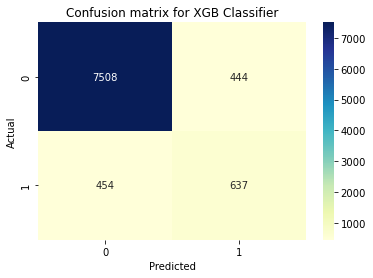



Model: Random Forest
Accuracy: 88%
Precision: 52%
Recall: 65%
F1 score: 58%
ROC score: 78%
Confusion matrix:
 [[7291  661]
 [ 380  711]]



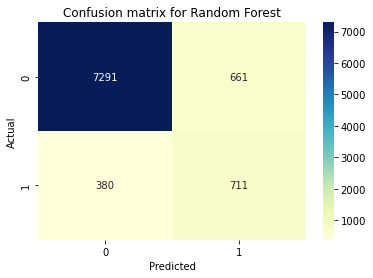



Model: K-Nearest neighbours
Accuracy: 79%
Precision: 31%
Recall: 60%
F1 score: 41%
ROC score: 71%
Confusion matrix:
 [[6519 1433]
 [ 440  651]]



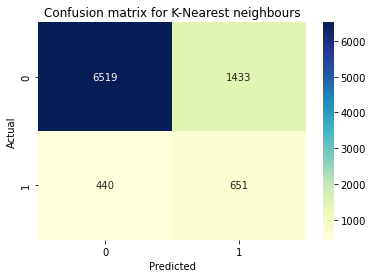



Model: SGD Classifier
Accuracy: 63%
Precision: 23%
Recall: 89%
F1 score: 37%
ROC score: 74%
Confusion matrix:
 [[4717 3235]
 [ 116  975]]



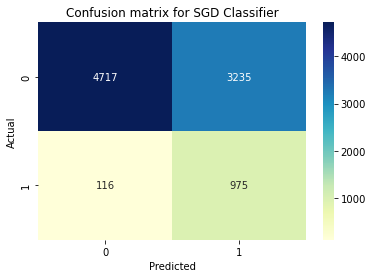



Model: SVC
Accuracy: 71%
Precision: 25%
Recall: 67%
F1 score: 36%
ROC score: 69%
Confusion matrix:
 [[5702 2250]
 [ 357  734]]



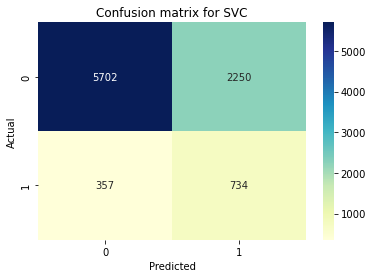



Model: Naive Bayes
Accuracy: 53%
Precision: 19%
Recall: 86%
F1 score: 31%
ROC score: 67%
Confusion matrix:
 [[3863 4089]
 [ 151  940]]



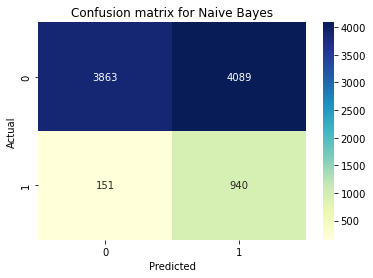



Model: Decision tree
Accuracy: 85%
Precision: 42%
Recall: 55%
F1 score: 47%
ROC score: 72%
Confusion matrix:
 [[7117  835]
 [ 495  596]]



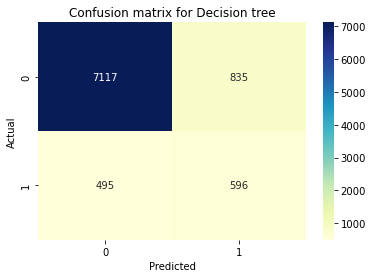



Model: Logistic Regression
Accuracy: 81%
Precision: 36%
Recall: 75%
F1 score: 49%
ROC score: 78%
Confusion matrix:
 [[6515 1437]
 [ 276  815]]



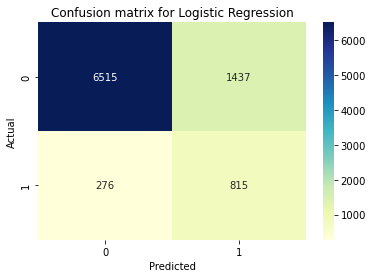

In [53]:
### loop through the algorithm to print the prediction score and confusion matrix
accuracy = {}
precision = {}
recall = {}
f1 = {}
roc = {}
conf_matrix = {}

for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    c_matrix = confusion_matrix(y_test, pred)
    
    accuracy[model_name] = str(round(a_score*100)) + '%'
    precision[model_name] = str(round(p_score*100)) + '%'
    recall[model_name] = str(round(r_score*100)) + '%'
    f1[model_name] = str(round(f_score*100)) + '%'
    roc[model_name] = str(round(roc_score*100)) + '%'
    conf_matrix[model_name] = c_matrix
    
    print(f'Model: {model_name}\nAccuracy: {accuracy[model_name]}\nPrecision: {precision[model_name]}\nRecall: {recall[model_name]}\nF1 score: {f1[model_name]}\nROC score: {roc[model_name]}\nConfusion matrix:\n {conf_matrix[model_name]}\n')

  # this will show the confusion matrix as a heatmap

    plt.figure(figsize=(6, 4))
    sns.heatmap(c_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('\n')

## Final Model Report: Post-SMOTE

After applying the Synthetic Minority Over-sampling Technique (SMOTE) to our dataset, we observed significant improvements in our machine learning models' performance, particularly in terms of Recall, F1 Score, and ROC score.

In conclusion, the models post-SMOTE not only maintained good general predictive performance but also significantly improved in areas where they initially lacked. This improvement indicates that the class imbalance issue was successfully mitigated, leading to more reliable and balanced models for predicting whether a customer will subscribe to a term deposit or not.

## Extract model names and accuracy scores to plot

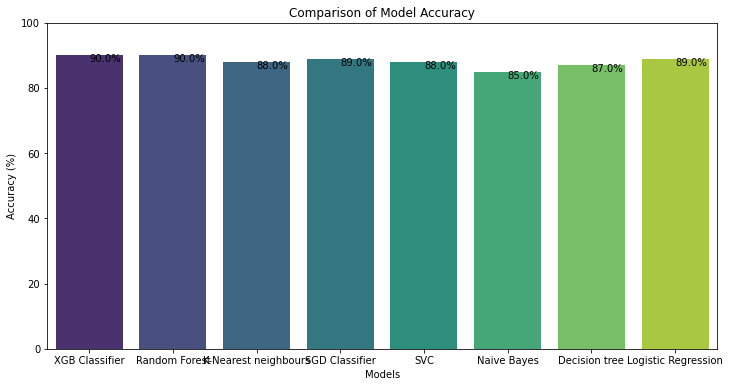

In [58]:
model_names = list(accuracy.keys())
accuracy_scores = [float(x.replace('%','')) for x in list(accuracy.values())]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title('Comparison of Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for index, value in enumerate(accuracy_scores):
    plt.text(index, value - 2, str(round(value, 2)) + '%')
plt.show()


## Summary of the Model Choice

We trained and evaluated several machine learning models and selected the XGBoost classifier as our final model due to its high performance. This model achieved an accuracy of 90%, demonstrating strong performance in predicting whether a customer will make a term deposit or not.

The Precision and Recall rates achieved were 59% and 58% respectively. Precision indicates that when the model predicted a customer would deposit, it was correct 59% of the time. On the other hand, Recall tells us that the model correctly identified 58% of all actual deposits. The model strikes a reasonable balance between Precision and Recall which is critical for our business problem.

The model achieved an F1 score of 59% and an ROC score of 76%, suggesting that the model has a good balance between precision and recall and it is capable of distinguishing between depositing and non-depositing customers.

## Banking Implications

The model's ability to predict whether a customer will make a deposit is a valuable tool for the bank. With these predictions, the bank can better allocate resources, targeting customers who are likely to make a deposit. This would potentially increase the overall efficiency of the bank's operations.

However, the trade-off between false positives and false negatives should be considered in the context of the bank's specific objectives and constraints. A false positive would mean that the bank might spend resources on a customer who is not going to make a deposit. On the other hand, a false negative would mean that the bank could miss the opportunity to secure a deposit from a customer. Given that our model has a balance between Precision (FP) and Recall (FN), it ensures that the bank doesn't over-invest in unlikely customers or miss out on potential deposits.

# Default prediction

In [60]:
dlp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


In [61]:
dlp2 = dlp[['age', 'job', 'marital', 'education', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration','deposit']]

label2 = dlp[['default']]

In [62]:
dlp2.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
deposit      object
dtype: object

In [63]:

label2.dtypes

default    object
dtype: object

In [64]:
##encode cateogry

encoder = LabelEncoder()

for cols in dlp2.columns:
    if dlp2[cols].dtype =='object':
        dlp2[cols] = encoder.fit_transform(dlp2[cols])
    else:
        dlp2[cols] = dlp2[cols]
        
dlp2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,deposit
0,58,4,1,2,2143,1,0,2,5,8,261,0
1,44,9,2,1,29,1,0,2,5,8,151,0
2,33,2,1,1,2,1,1,2,5,8,76,0
3,47,1,1,3,1506,1,0,2,5,8,92,0
4,33,11,2,3,1,0,0,2,5,8,198,0


In [65]:
label2['default'] = encoder.fit_transform(label2['default'])

label2.head()

,default
0,0
1,0
2,0
3,0
4,0


In [66]:
scaler = MinMaxScaler()

dlp2["Scaled_age"] = scaler.fit_transform(dlp2['age'].values.reshape(-1,1))
dlp2["Scaled_balance"] = scaler.fit_transform(dlp2['balance'].values.reshape(-1,1))
dlp2["Scaled_duration"] = scaler.fit_transform(dlp2['duration'].values.reshape(-1,1))


In [67]:
dlp2.drop(['age','balance','duration'],axis=1,inplace=True)

In [68]:
        
dlp2.head()

,job,marital,education,housing,loan,contact,day,month,deposit,Scaled_age,Scaled_balance,Scaled_duration
0,4,1,2,1,0,2,5,8,0,0.519481,0.092259,0.053070
1,9,2,1,1,0,2,5,8,0,0.337662,0.073067,0.030704
2,2,1,1,1,1,2,5,8,0,0.194805,0.072822,0.015453
3,1,1,3,1,0,2,5,8,0,0.376623,0.086476,0.018707
4,11,2,3,0,0,2,5,8,0,0.194805,0.072812,0.040260


In [69]:
print(dlp['default'].value_counts())


no     44396
yes      815
Name: default, dtype: int64


In [70]:
X_train, X_test, y_train, y_test = train_test_split(dlp2, label2, test_size=0.2, random_state=42)

In [71]:
from imblearn.over_sampling import SMOTE

sm2 = SMOTE(random_state=42)
X_train_res2, y_train_res2 = sm.fit_resample(X_train, y_train)

In [72]:
from sklearn.metrics import confusion_matrix, f1_score
## Machine learning models in classsifier

classifiers = [[XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(),'K-Nearest neighbours'],
               [SGDClassifier(),'SGD Classifier'],
               [SVC(),'SVC'],
               [GaussianNB(),'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]


Model: XGB Classifier
Accuracy: 98%
Precision: 20%
Recall: 9%
F1 score: 12%
ROC score: 54%
Confusion matrix:
 [[8856   49]
 [ 126   12]]



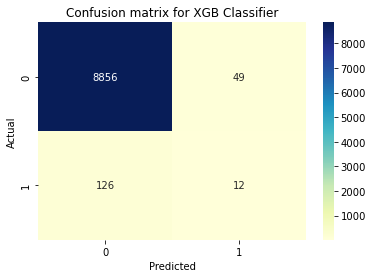



Model: Random Forest
Accuracy: 95%
Precision: 8%
Recall: 22%
F1 score: 12%
ROC score: 59%
Confusion matrix:
 [[8560  345]
 [ 108   30]]



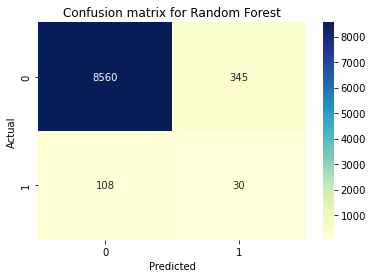



Model: K-Nearest neighbours
Accuracy: 84%
Precision: 2%
Recall: 19%
F1 score: 4%
ROC score: 52%
Confusion matrix:
 [[7607 1298]
 [ 112   26]]



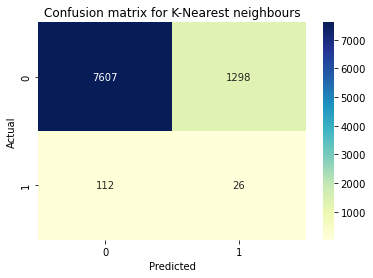



Model: SGD Classifier
Accuracy: 55%
Precision: 2%
Recall: 66%
F1 score: 4%
ROC score: 60%
Confusion matrix:
 [[4888 4017]
 [  47   91]]



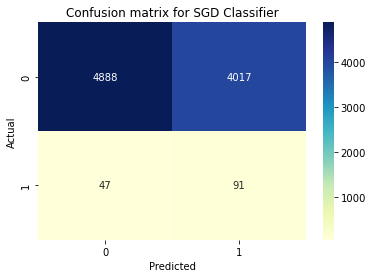



Model: SVC
Accuracy: 65%
Precision: 2%
Recall: 49%
F1 score: 4%
ROC score: 57%
Confusion matrix:
 [[5768 3137]
 [  70   68]]



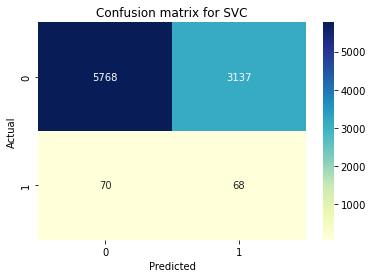



Model: Naive Bayes
Accuracy: 35%
Precision: 2%
Recall: 88%
F1 score: 4%
ROC score: 61%
Confusion matrix:
 [[3016 5889]
 [  16  122]]



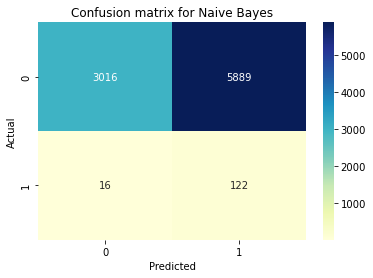



Model: Decision tree
Accuracy: 93%
Precision: 7%
Recall: 29%
F1 score: 11%
ROC score: 61%
Confusion matrix:
 [[8331  574]
 [  98   40]]



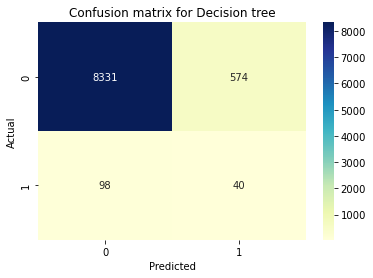



Model: Logistic Regression
Accuracy: 67%
Precision: 2%
Recall: 49%
F1 score: 4%
ROC score: 58%
Confusion matrix:
 [[5975 2930]
 [  71   67]]



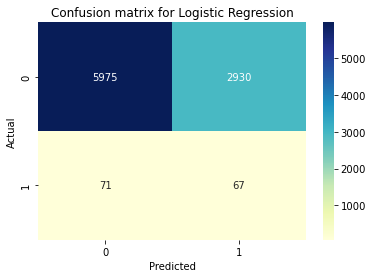

In [73]:
### loop through the algorithm to print the prediction score and confusion matrix
accuracy = {}
precision = {}
recall = {}
f1 = {}
roc = {}
conf_matrix = {}

for classes in classifiers:
    model = classes[0]
    model_name = classes[1]
    
    model.fit(X_train_res2, y_train_res2)
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    c_matrix = confusion_matrix(y_test, pred)
    
    accuracy[model_name] = str(round(a_score*100)) + '%'
    precision[model_name] = str(round(p_score*100)) + '%'
    recall[model_name] = str(round(r_score*100)) + '%'
    f1[model_name] = str(round(f_score*100)) + '%'
    roc[model_name] = str(round(roc_score*100)) + '%'
    conf_matrix[model_name] = c_matrix
    
    print(f'Model: {model_name}\nAccuracy: {accuracy[model_name]}\nPrecision: {precision[model_name]}\nRecall: {recall[model_name]}\nF1 score: {f1[model_name]}\nROC score: {roc[model_name]}\nConfusion matrix:\n {conf_matrix[model_name]}\n')

  # this will show the confusion matrix as a heatmap

    plt.figure(figsize=(6, 4))
    sns.heatmap(c_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('\n')

In [75]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.02


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.02')

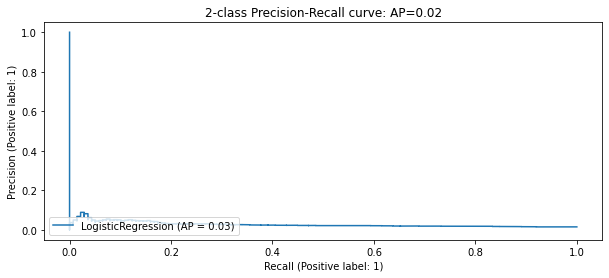

In [76]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


## Extract model names and accuracy scores

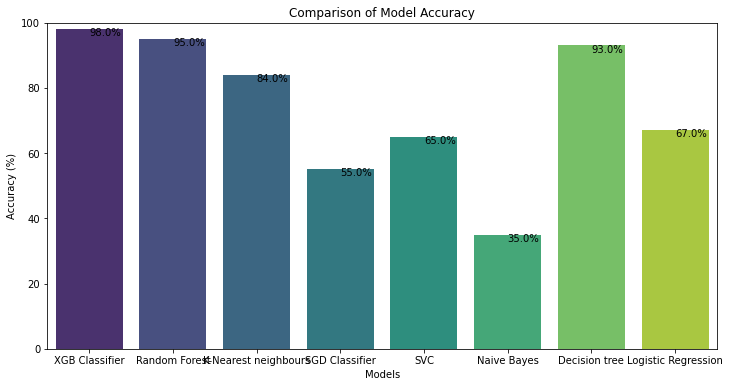

In [77]:

model_names = list(accuracy.keys())
accuracy_scores = [float(x.replace('%','')) for x in list(accuracy.values())]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title('Comparison of Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for index, value in enumerate(accuracy_scores):
    plt.text(index, value - 2, str(round(value, 2)) + '%')
plt.show()


# Summary Report and Conclusion

I conducted a binary classification task to predict the likelihood of a customer defaulting on their loan using the banking dataset. The dataset was quite imbalanced, with the majority of customers not defaulting.

Our initial preprocessing included feature selection and encoding categorical features. The features used for this model included 
* [ 'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', and 'deposit'] 

The target variable, 'default', was also binary-encoded.


I split the data into training and testing sets, maintaining a 80:20 ratio, and used the SMOTE technique to address the class imbalance by oversampling the minority class in our training data. Furthermore employed a variety of classifiers, including XGB Classifier, Random Forest, K-Nearest neighbors, SGD Classifier, SVC, Naive Bayes, Decision tree, and Logistic Regression. These models were trained on the resampled training set and predictions were made on the original test set. The evaluation metrics used were accuracy, precision, recall, F1 score, and ROC score. Due to the class imbalance, we also looked into the Precision-Recall Curve to better evaluate the models.

  Overall, the performance of the models was not impressive with regards to the minority class (defaulting customers), largely due to the imbalanced nature of the dataset. Most of the models showed high accuracy, but this is a misleading metric in the context of imbalanced datasets. The precision, recall, and F1 scores for the positive class were relatively low for most models, implying a high number of false positives and false negatives.This shows that while the models are fairly good at predicting non-defaulting customers, they struggle to correctly classify defaulting customers, which is the more critical aspect for the bank. Therefore, further tuning and use of alternative resampling strategies or cost-sensitive methods should be considered for future iterations of the model to improve its ability to predict customer default.

In terms of our business problem and application, enhancing the prediction for defaulting customers is crucial as it allows the bank to mitigate potential risks associated with loan defaults. A model that can accurately predict potential defaulters will provide significant business value by enabling the bank to make more informed decisions regarding loan approval.